In [177]:
import sqlite3
import json
import os
import requests
import pandas as pd

In [178]:
def setUpDatabase(db_name):
    path = os.path.dirname(os.path.abspath('./'))
    conn = sqlite3.connect(path+'/'+db_name)
    return conn

In [179]:
conn = setUpDatabase('Artworks_db')

In [180]:
conn

In [181]:
conn = sqlite3.connect(r'C:\Users\skyed\OneDrive\Desktop\si 206\final project\Artworks_db')
cur = conn.cursor()
cur.execute("CREATE TABLE if not exists Art_Works_final (objectID INTEGER,title TEXT,department TEXT,objectBeginDate INTEGER,objectEndDate INTEGER)")
conn.commit()
cur.execute("select * from Art_Works_final")
print(cur.fetchall())

[(1, 'One-dollar Liberty Head Coin', 'The American Wing', 1853, 1853), (2, 'Ten-dollar Liberty Head Coin', 'The American Wing', 1901, 1901), (3, 'Two-and-a-Half Dollar Coin', 'The American Wing', 1909, 1927), (10, 'Two-and-a-half-dollar Indian Head Coin', 'The American Wing', 1912, 1912), (11, 'Two-and-a-half-dollar Liberty Head Coin', 'The American Wing', 1907, 1907), (12, 'Twenty-dollar Liberty Head Coin', 'The American Wing', 1876, 1876), (13, 'Five-dollar Indian Head Coin', 'The American Wing', 1910, 1910), (14, 'Five-dollar Liberty Head Coin', 'The American Wing', 1907, 1907), (15, 'Coin, 1/2 Real', 'The American Wing', 1665, 1700), (16, 'Coin, 1/4 Peso', 'The American Wing', 1800, 1900), (22, 'Coin, 1/4 Real', 'The American Wing', 1881, 1881), (24, 'Coin, 10 Centavos', 'The American Wing', 1860, 1870), (32, 'Coin, 20 Pesos', 'The American Wing', 1866, 1866), (33, 'Bust of Abraham Lincoln', 'The American Wing', 1876, 1876), (34, 'Acorn Clock', 'The American Wing', 1847, 1850), (35

In [182]:
## Check for Data!
cur.execute("select * from Art_Works_final")
re= pd.DataFrame(cur.fetchall())
re

,0,1,2,3,4
0,1,One-dollar Liberty Head Coin,The American Wing,1853,1853
1,2,Ten-dollar Liberty Head Coin,The American Wing,1901,1901
2,3,Two-and-a-Half Dollar Coin,The American Wing,1909,1927
3,10,Two-and-a-half-dollar Indian Head Coin,The American Wing,1912,1912
4,11,Two-and-a-half-dollar Liberty Head Coin,The American Wing,1907,1907
...,...,...,...,...,...
96,454,Bench,The American Wing,1697,1700
97,457,Sleigh Seat,The American Wing,1797,1800
98,465,Figure of Benjamin Franklin,The American Wing,1835,1845
99,466,Plaque Portrait of Benjamin Franklin,The American Wing,1800,1883


In [183]:
i=0
var = True
while var==True:
    base_url = f'https://collectionapi.metmuseum.org/public/collection/v1/objects/'+str(i)
    r = requests.get(base_url)
    json_data = json.loads(r.content)
    if len(json_data)>1:
        df=pd.DataFrame([json_data])
        Cleaned_df=df[['objectID','title','department','objectBeginDate','objectEndDate']]
        Cleaned_df['title']=Cleaned_df['title'].astype(str)
        Cleaned_df['department']=Cleaned_df['department'].astype(str)
        cur.execute("select distinct title from Art_Works_final")
        All_Entries=pd.DataFrame(cur.fetchall())
        ##print(All_Entries)
        j=0
        present=False
        while j<len(All_Entries):
            if (All_Entries[0].iloc[j]==Cleaned_df['title'].iloc[0]):
                present=True
            j+=1
        if (present==False):
            Cleaned_df.to_sql('Art_Works_final',conn,if_exists='append',index=False)
            conn.commit()
    i+=1        
    cur.execute("select distinct title from Art_Works_final")
    temp=pd.DataFrame(cur.fetchall())
    if (len(temp)>100):
        var=False 


In [184]:
cur.execute("select * from Art_Works_final")
re= pd.DataFrame(cur.fetchall())
column_names = [i[0] for i in cur.description]
re.columns=column_names
re

,objectID,title,department,objectBeginDate,objectEndDate
0,1,One-dollar Liberty Head Coin,The American Wing,1853,1853
1,2,Ten-dollar Liberty Head Coin,The American Wing,1901,1901
2,3,Two-and-a-Half Dollar Coin,The American Wing,1909,1927
3,10,Two-and-a-half-dollar Indian Head Coin,The American Wing,1912,1912
4,11,Two-and-a-half-dollar Liberty Head Coin,The American Wing,1907,1907
...,...,...,...,...,...
96,454,Bench,The American Wing,1697,1700
97,457,Sleigh Seat,The American Wing,1797,1800
98,465,Figure of Benjamin Franklin,The American Wing,1835,1845
99,466,Plaque Portrait of Benjamin Franklin,The American Wing,1800,1883


In [185]:

max_Begin_Date=re.max(axis=0)['objectBeginDate'] 
min_Begin_Date=re.min(axis=0)['objectBeginDate']
Avg_Begin_Date=re.mean(axis=0)['objectBeginDate']

max_End_Date=re.max(axis=0)['objectEndDate'] 
min_End_Date=re.min(axis=0)['objectEndDate']
Avg_End_Date=re.mean(axis=0)['objectEndDate']

re['Difference']=re['objectEndDate']-re['objectBeginDate'] 
longest_Object_Time=re.max(axis=0)['Difference']
Avg_Object_Time=re.mean(axis=0)['Difference']

C:\Users\skyed\AppData\Local\Temp\ipykernel_30864\4100489077.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Avg_Begin_Date=re.mean(axis=0)['objectBeginDate']
C:\Users\skyed\AppData\Local\Temp\ipykernel_30864\4100489077.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Avg_End_Date=re.mean(axis=0)['objectEndDate']
C:\Users\skyed\AppData\Local\Temp\ipykernel_30864\4100489077.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Avg_Object_Time=re.mean(axis=0)['Difference']


In [186]:
f = open(r"C:\Users\skyed\OneDrive\Desktop\si 206\final project\MyNewOutput.txt", "w")


In [187]:
f.write("Max Begin Date is: "+str(max_Begin_Date)+"\n")
f.write("Min Begin Date is: "+str(min_Begin_Date)+"\n")
f.write("Average Begin Date is: "+str(Avg_Begin_Date)+"\n")
f.write("Max End Date is: "+str(max_End_Date)+"\n")
f.write("Min End Date is: "+str(min_End_Date)+"\n")
f.write("Average End Date is: "+str(Avg_End_Date)+"\n")
f.write("Longest Object Time is: "+str(longest_Object_Time)+"\n")
f.write("Average Object Time is: "+str(Avg_Object_Time)+"\n")
f.close()


import json

f = open(r"C:\Users\skyed\OneDrive\Desktop\si 206\final project\MyNewOutput.txt", "r")
content = f.read()
splitcontent = content.splitlines()

d = []
for v in splitcontent:
    l = v.split(' | ')
    d.append(dict(s.split(':',1) for s in l))


with open("Output.json", 'w') as file:
    file.write((json.dumps(d, indent=4, sort_keys= False)))

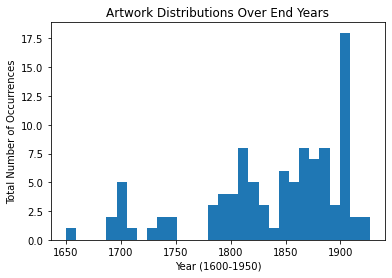

In [188]:
import matplotlib.pyplot as plt
x = re['objectEndDate']
plt.hist(x, bins=30)
plt.ylabel('Total Number of Occurrences')
plt.xlabel('Year (1600-1950)')
plt.title('Artwork Distributions Over End Years')  
plt.show()